# Polar Codes for the Binary Symmetric Channel
This Jupyter notebook demonstrates how to use [Polar.jl](https://github.com/jneu-research/Polar.jl) on the [binary symmetric channel (BSC)](https://en.wikipedia.org/wiki/Binary_symmetric_channel).
It extends the material of `01-code-design-biawgn.ipynb` and `02-fer-curve-biawgn.ipynb` to the BSC.
Hence, explanations in this notebook are brief -- check the aforementioned notebooks for further details.

The BSC has a channel parameter $p$ which denotes the probability that the channel input is flipped by the channel (flips occur independently and identically distributed).
At $p\approx0.11$, the BSC has a capacity of $\approx1/2$ bits per channel access.
We design a code for $p=0.075$ with $m=7$ and $k=64$.

## Preparations
Activate project-local Julia environment and load plots library

In [1]:
using Pkg
Pkg.activate(".")

using Plots
pyplot()

Plots.PyPlotBackend()

## Code Design
Load necessary parts of Polar.jl

In [2]:
# using Revise

In [3]:
using Polar.Design: design_densityevolution
using Polar.Visualizations: plot_code, plot_codecomparison, plot_errorprobability_annotated, plot_mutualinformation_annotated
using Polar.CommunicationsUtils: ebn0db2σ²
using Polar.Channels: BSChannel
using Polar.BridgeCh2DE: channeloutputdistribution
using Polar.DensityEvolution: densityevolution

┌ Warning: Package Polar does not have Plots in its dependencies:
│ - If you have Polar checked out for development and have
│   added Plots as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Polar
│ Loading Plots into Polar from project dependency, future warnings for Polar are suppressed.
└ @ nothing nothing:840


Set design parameters

In [4]:
m = 7
k = 64
p_design = 0.075

0.075

### Design using density evolution
Codes designed using density evolution perform well under successive cancellation decoding

In [5]:
channel = BSChannel(p_design)
distribution = channeloutputdistribution(channel)
frozen_vector_de = design_densityevolution(m, k, distribution);

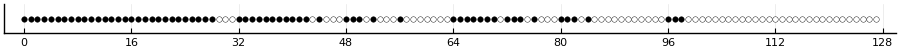

In [6]:
@assert frozen_vector_de == Bool[true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, false, false, true, true, true, true, true, true, true, true, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, true, false, false, false, false, false, false, false, true, true, true, true, true, true, true, false, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, false, false, false, false, false, false, false, false, true, true, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false]
plot_code(frozen_vector_de)

Compare to code designed in `01-code-design-biawgn.ipynb` for BIAWGN

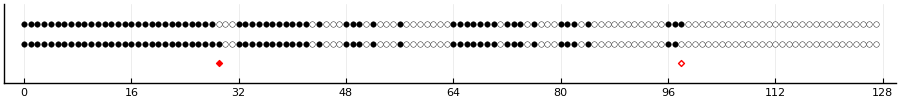

In [7]:
frozen_vector_de_biawgn = Bool[true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, false, true, true, true, true, true, true, true, true, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, true, false, false, false, false, false, false, false, true, true, true, true, true, true, true, false, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, false, false, false, false, false, false, false, false, true, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false]
plot_codecomparison(frozen_vector_de, frozen_vector_de_biawgn)

### Plot error probability of bits

In [8]:
densityevolution_result = densityevolution(m, distribution);

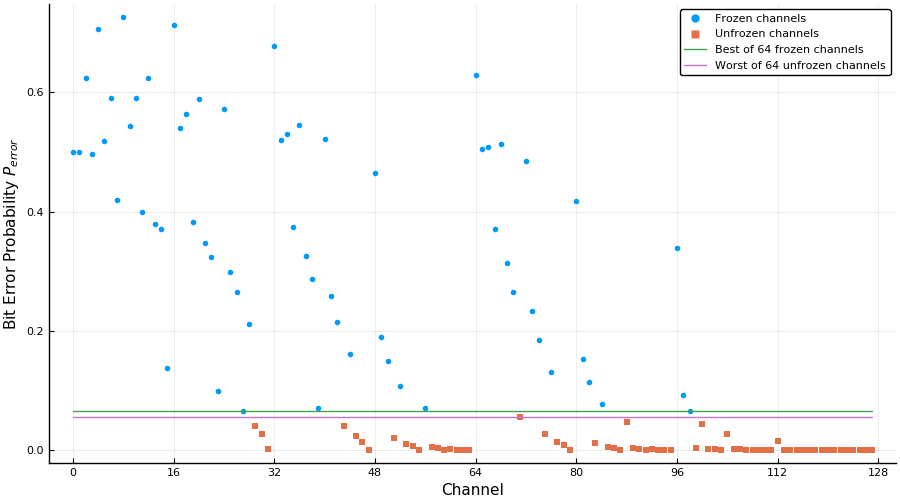

In [9]:
plot_errorprobability_annotated(densityevolution_result, frozen_vector_de)

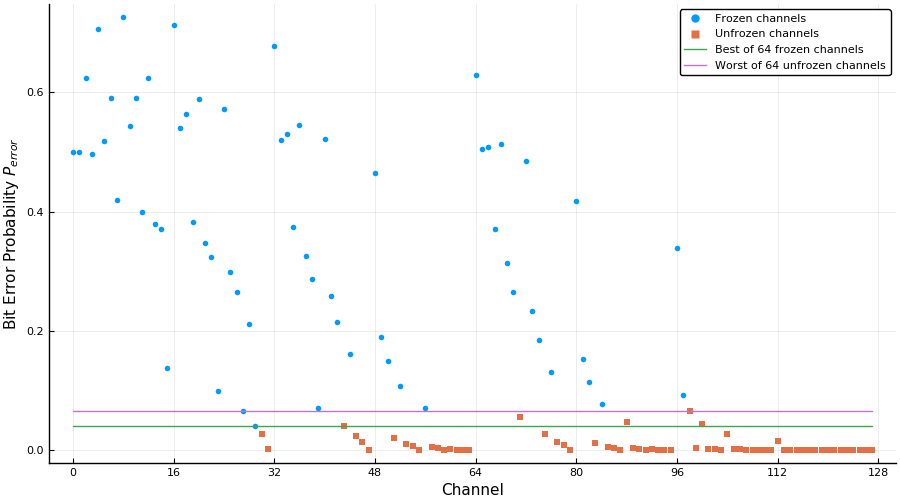

In [10]:
plot_errorprobability_annotated(densityevolution_result, frozen_vector_de_biawgn)

## Code Simulations
Load necessary parts of Polar.jl

In [11]:
using Polar.PolarCodes: PolarCode, polarencode, deinterleave, R
using Polar.GF2n: GF2_0, GF2_1, GF2Element
using Polar.Channels: BSChannel, get_f, get_llr
using Polar.PolarDecoding: SCLDecoder, UnquantizedLLR, UnquantizedPM, decode!, extract_best_pm
using Polar.SimulationUtils: sim_parallel_experiments_fer_simple01, SimulationResult, rate

In [12]:
code_de = PolarCode(frozen_vector_de)

PolarCode{128,64}(fingerprint=d2db73ab4ca85792)

The FER curve is simulated for a BSC with $p$ in the range of $p = 0.05$ to $p = 0.13$ and list sizes $L\in\{1,4,32\}$, up to a relative precision of $20\%$:

In [13]:
ps = 0.05:0.01:0.13
Ls = [1, 4, 32]
code = code_de

simulation_results = Dict{Tuple{Int,Float64},SimulationResult{(:ListError, :MLError, :PMError)}}()

for L in Ls
    decoder = SCLDecoder{m,L,UnquantizedLLR,UnquantizedPM,code}()
    
    for p in ps
        @show (L, p)

        channel = BSChannel(p)

        simulation_results[(L, p)] = sim_parallel_experiments_fer_simple01(code, decoder, channel; desired_ci_rel=0.2, desired_ci_event=:PMError)

        @show simulation_results[(L, p)]
    end
end

(L, p) = (1, 0.05)
  2.327891 seconds (35.70 M allocations: 721.612 MiB, 9.81% gc time)
elapsed time (ns): 2327891315
gc time (ns):      228277986
bytes allocated:   756664917
pool allocs:       35695888
non-pool GC allocs:716
malloc() calls:    15
realloc() calls:   4
GC pauses:         33
simulation_results[(L, p)] = SimulationResult{(:ListError, :MLError, :PMError)}(Dict(:ListError=>1037,:PMError=>1037,:ANY=>19200,:MLError=>269))
(L, p) = (1, 0.06)
  1.125259 seconds (34.59 M allocations: 606.442 MiB, 8.82% gc time)
elapsed time (ns): 1125259379
gc time (ns):      99246098
bytes allocated:   635900368
pool allocs:       34591766
non-pool GC allocs:1
GC pauses:         27
simulation_results[(L, p)] = SimulationResult{(:ListError, :MLError, :PMError)}(Dict(:ListError=>2330,:PMError=>2330,:ANY=>19200,:MLError=>587))
(L, p) = (1, 0.07)
  1.151157 seconds (37.17 M allocations: 648.482 MiB, 8.75% gc time)
elapsed time (ns): 1151157013
gc time (ns):      100722134
bytes allocated:   679982

 26.495642 seconds (779.09 M allocations: 12.512 GiB, 10.68% gc time)
elapsed time (ns): 26495641955
gc time (ns):      2830595732
bytes allocated:   13435164448
pool allocs:       779084643
non-pool GC allocs:3942
GC pauses:         586
simulation_results[(L, p)] = SimulationResult{(:ListError, :MLError, :PMError)}(Dict(:ListError=>614,:PMError=>3941,:ANY=>19200,:MLError=>3275))
(L, p) = (32, 0.09)
 26.664422 seconds (782.51 M allocations: 12.585 GiB, 10.75% gc time)
elapsed time (ns): 26664422415
gc time (ns):      2867528796
bytes allocated:   13512876448
pool allocs:       782499876
non-pool GC allocs:5941
GC pauses:         589
simulation_results[(L, p)] = SimulationResult{(:ListError, :MLError, :PMError)}(Dict(:ListError=>1469,:PMError=>5940,:ANY=>19200,:MLError=>5151))
(L, p) = (32, 0.1)
 26.158718 seconds (786.18 M allocations: 12.635 GiB, 10.88% gc time)
elapsed time (ns): 26158718351
gc time (ns):      2846050031
bytes allocated:   13567152624
pool allocs:       786172610
non

Plot FER curves

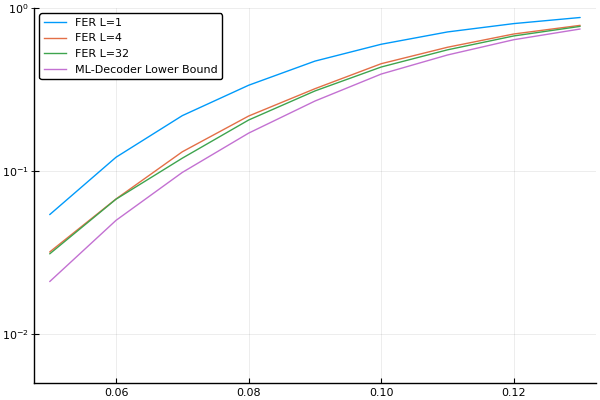

In [14]:
p = plot(yscale=:log10, yticks=[0.001, 0.01, 0.1, 1.0], ylim=(0.005, 1))
for L in Ls
    plot!(ps, x -> rate(simulation_results[(L, x)], :PMError), label="FER L=$(L)")
end
plot!(ps, x -> rate(simulation_results[(32, x)], :MLError), label="ML-Decoder Lower Bound")
p